<a href="https://colab.research.google.com/github/zulfiqarAlibalti/2018-ML-Projects/blob/master/Yolo%20Basic%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [159]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/pedestrian.jpg",0)

In [160]:
type(image)

numpy.ndarray

In [161]:
image.shape

(724, 1086)

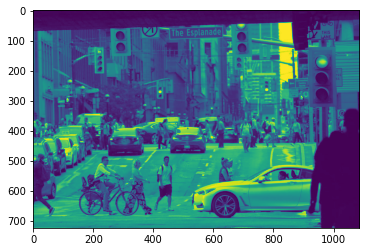

In [162]:
plt.imshow(image)

In [163]:
new_img = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2RGB)

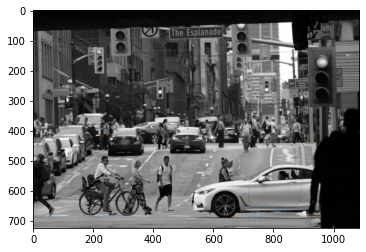

In [164]:
plt.imshow(new_img)

In [165]:
"""
1. Splitting image channels
"""

r, g,b = cv2.split(new_img)
"""print('r',r.shape)
print('g',g.shape)
print('b', b.shape)
"""
new_img = cv2.merge((r,g,b))

In [166]:
"""
Resize the images
"""
s  =10
w = int(new_img.shape[1]*s/100)
h = int(new_img.shape[0]*s/100)
dim = (w,h)
resize = cv2.resize(new_img, dim, interpolation = cv2.INTER_AREA)
resize.shape

(72, 108, 3)

In [167]:
"""
Rotate Operation
"""
(h,w) = new_img.shape[:2]
c = (w/2, h/2)
angle = 90
m = cv2.getRotationMatrix2D(c,angle, 1.0)
rotated_img = cv2.warpAffine(new_img, m, (h,w))


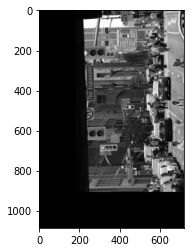

In [168]:
plt.imshow(rotated_img)

**CNN For Image Processing**

Convolutional Neural Network, lke neural networks , are made up of neurons with learnable weights and biases, Each receives several inputs, takes a weighted sum over them, pass it through an activation function and responds with and output.
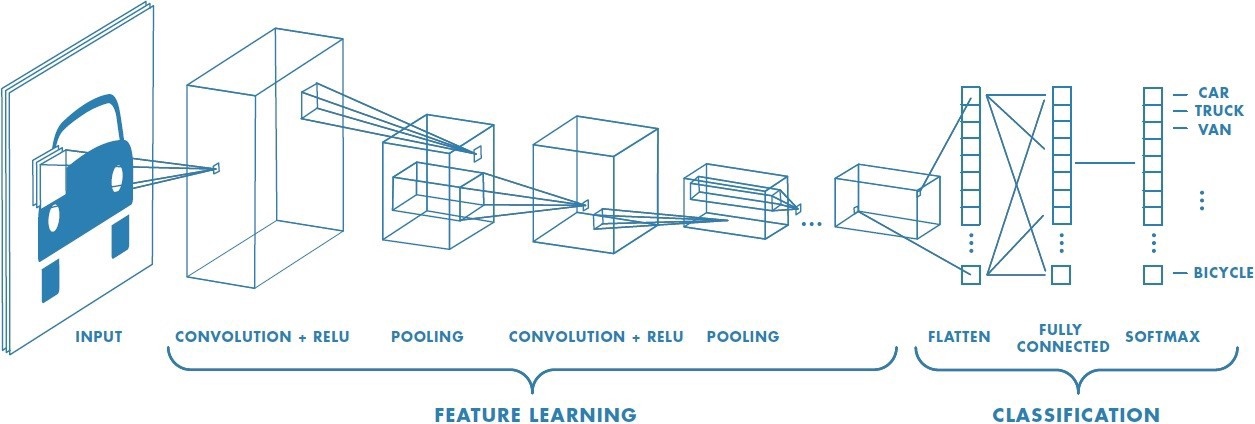

**Real time Object Detection using YOLO**

**YOLO Algorithm**
Yolo algorithm is an algorithm based on regression, instread of slecting the interesting part of an Image, it predicts classes and bounding boxes for the whole image in one run of the algorithm.

In [169]:
yolo = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")

In [170]:
clsses = []

with open("/content/coco.names", 'r') as f:
  classes = f.read().splitlines()

In [171]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [172]:
len(classes)

80

In [173]:
img = cv2.imread("/content/pedestrian.jpg")
height, width, _ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0),swapRB = True, crop = False)

In [174]:
blob.shape

(1, 3, 320, 320)

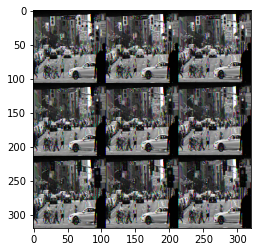

In [175]:
# To print image
i = blob[0].reshape((320,320,3))
plt.imshow(i)

In [176]:
yolo.setInput(blob)

In [177]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [178]:
# width = int(blob.shape[1])
# height = int(blob.shape[0])

In [179]:
boxes = []
confidences = []
class_ids = []
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [180]:
len(boxes)

26

In [181]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [182]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(255,0,size = (len(boxes),3))

In [183]:
for i in indexes.flatten():
  x, y ,w, h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(img, (x,y), (x+w, y+h), color,1)
  cv2.putText(img, label +" " + confi, (x,y+20), font,2 ,(255,0,0),2)

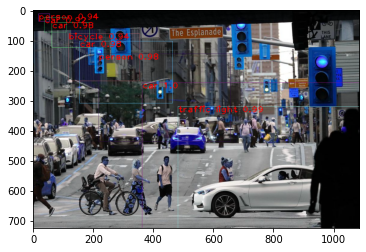

In [184]:
plt.imshow(img)

In [185]:
cv2.imwrite("./img.jpg",img)

True